# Project Milestone 1: Optimization Algorithm Comparison

In this project milestone, we aim to compare the performance of five popular optimization algorithms for training a shallow neural network on the MNIST dataset. These algorithms are:

1. Stochastic Gradient Descent (SGD)
2. Gradient Descent with Momentum
3. Adagrad
4. Adadelta
5. Adam

**MNIST** is a well-known dataset in the field of machine learning. It consists of a large collection of 28x28 pixel grayscale images, each depicting a handwritten digit from 0 to 9. Our objective is to leverage these optimization algorithms to train a neural network model capable of recognizing and classifying these handwritten digits.

## Team Members

This project is a collaborative effort by the following team members:

1. **Ahmed Hisham Fathy Hassabou**
   - Student ID: 19P4007

2. **Eslam Elhusseini**
   - Student ID: 19P9651

---

**Note**: In the subsequent sections of this notebook, we will detail the implementation, training, and evaluation of the neural network models using each of the aforementioned optimization algorithms. We will present the results of our comparative analysis, shedding light on the strengths and weaknesses of each optimization method in the context of MNIST digit recognition.


In [1]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD, Adam, Adagrad, Adadelta
from tensorflow.keras.callbacks import TensorBoard
from datetime import datetime
from tensorflow.keras.callbacks import Callback

In [2]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
# Normalize the pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

In [4]:
# Define a shallow neural network model
def create_shallow_nn(optimizer):
    model = Sequential([
        Flatten(input_shape=(28, 28)),   # Flatten the 28x28 input images to a 1D vector
        Dense(128, activation='relu'),   # Hidden layer with 128 units and ReLU activation
        Dense(10, activation='softmax')  # Output layer with 10 units (for 10 classes) and softmax activation
    ])
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',  # Loss function for classification
                  metrics=['accuracy'])
    return model

In [5]:
# Define the optimization algorithms to compare
optimizers = {
    'SGD': SGD(),
    'Momentum': SGD(momentum=0.9),
    'Adagrad': Adagrad(),
    'Adadelta': Adadelta(),
    'Adam': Adam()
}

In [6]:
# Train and evaluate models with different optimizers
results = {}

for optimizer_name, optimizer in optimizers.items():
    model = create_shallow_nn(optimizer)

    # Log training using TensorBoard
    log_dir = "logs/fit/" + optimizer_name + datetime.now().strftime("%Y%m%d-%H%M%S")
    tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

    print(f"Training model with {optimizer_name} optimizer...")
    history = model.fit(x_train, y_train, epochs=100, validation_split=0.2, callbacks=[tensorboard_callback])

    # Access the training loss and accuracy history as numpy arrays
    train_loss = np.array(history.history['loss'])
    train_accuracy = np.array(history.history['accuracy'])
    val_loss = np.array(history.history['val_loss'])
    val_accuracy = np.array(history.history['val_accuracy'])

    # Evaluate the model
    test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)

    #saving results
    results[optimizer_name] = {'test_loss': test_loss, 'test_accuracy': test_accuracy, 'train_losses': train_loss,
                               'train_accuracy': train_accuracy, 'val_accuracy': val_accuracy, 'val_loss': val_loss }
    print(f"Test accuracy with {optimizer_name}: {test_accuracy * 100:.2f}%")




Training model with SGD optimizer...
Epoch 1/100
1500/1500 [==============================] - 11s 5ms/step - loss: 0.7132 - accuracy: 0.8204 - val_loss: 0.3807 - val_accuracy: 0.8967
Epoch 2/100
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3640 - accuracy: 0.8980 - val_loss: 0.3126 - val_accuracy: 0.9103
Epoch 3/100
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3126 - accuracy: 0.9111 - val_loss: 0.2806 - val_accuracy: 0.9191
Epoch 4/100
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2824 - accuracy: 0.9195 - val_loss: 0.2576 - val_accuracy: 0.9255
Epoch 5/100
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2593 - accuracy: 0.9272 - val_loss: 0.2413 - val_accuracy: 0.9308
Epoch 6/100
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2404 - accuracy: 0.9325 - val_loss: 0.2268 - val_accuracy: 0.9360
Epoch 7/100
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2249 - accura

In [7]:
# Compare the results
for optimizer_name, result in results.items():
    print(f"Optimizer: {optimizer_name}")
    print(f"Test Loss: {result['test_loss']:.4f}")
    print(f"Test Accuracy: {result['test_accuracy'] * 100:.2f}%")
    print("\n")

Optimizer: SGD
Test Loss: 0.0750
Test Accuracy: 97.75%


Optimizer: Momentum
Test Loss: 0.0874
Test Accuracy: 97.87%


Optimizer: Adagrad
Test Loss: 0.1981
Test Accuracy: 94.32%


Optimizer: Adadelta
Test Loss: 0.3353
Test Accuracy: 91.38%


Optimizer: Adam
Test Loss: 0.2449
Test Accuracy: 97.61%




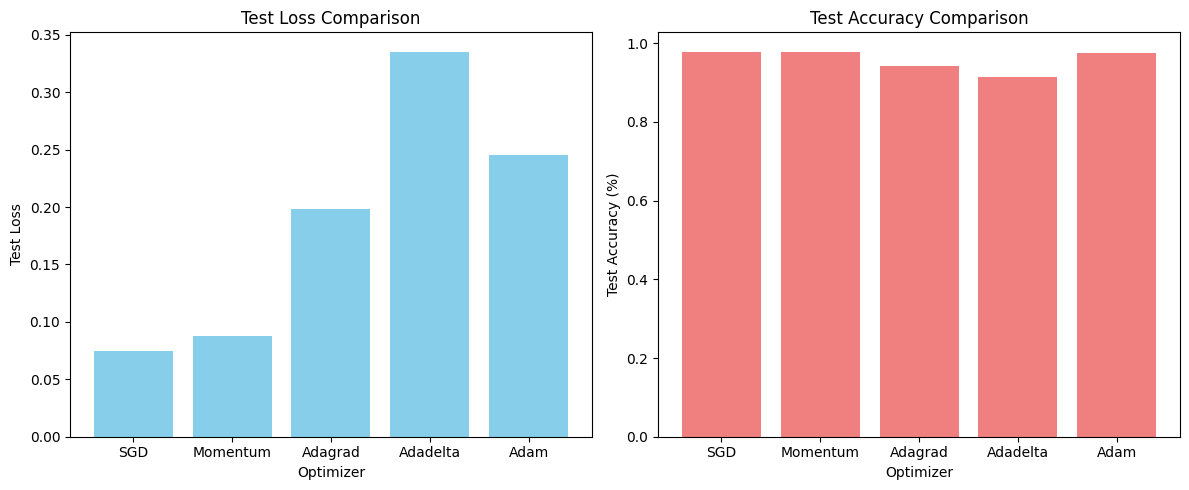

In [8]:
import matplotlib.pyplot as plt

# Extract the results for visualization
optimizer_names = list(results.keys())
test_losses = [results[optimizer]['test_loss'] for optimizer in optimizer_names]
test_accuracies = [results[optimizer]['test_accuracy'] for optimizer in optimizer_names]

# Create bar charts for test loss and test accuracy
plt.figure(figsize=(12, 5))

# Bar chart for test loss
plt.subplot(1, 2, 1)
plt.bar(optimizer_names, test_losses, color='skyblue')
plt.title('Test Loss Comparison')
plt.xlabel('Optimizer')
plt.ylabel('Test Loss')

# Bar chart for test accuracy
plt.subplot(1, 2, 2)
plt.bar(optimizer_names, test_accuracies, color='lightcoral')
plt.title('Test Accuracy Comparison')
plt.xlabel('Optimizer')
plt.ylabel('Test Accuracy (%)')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


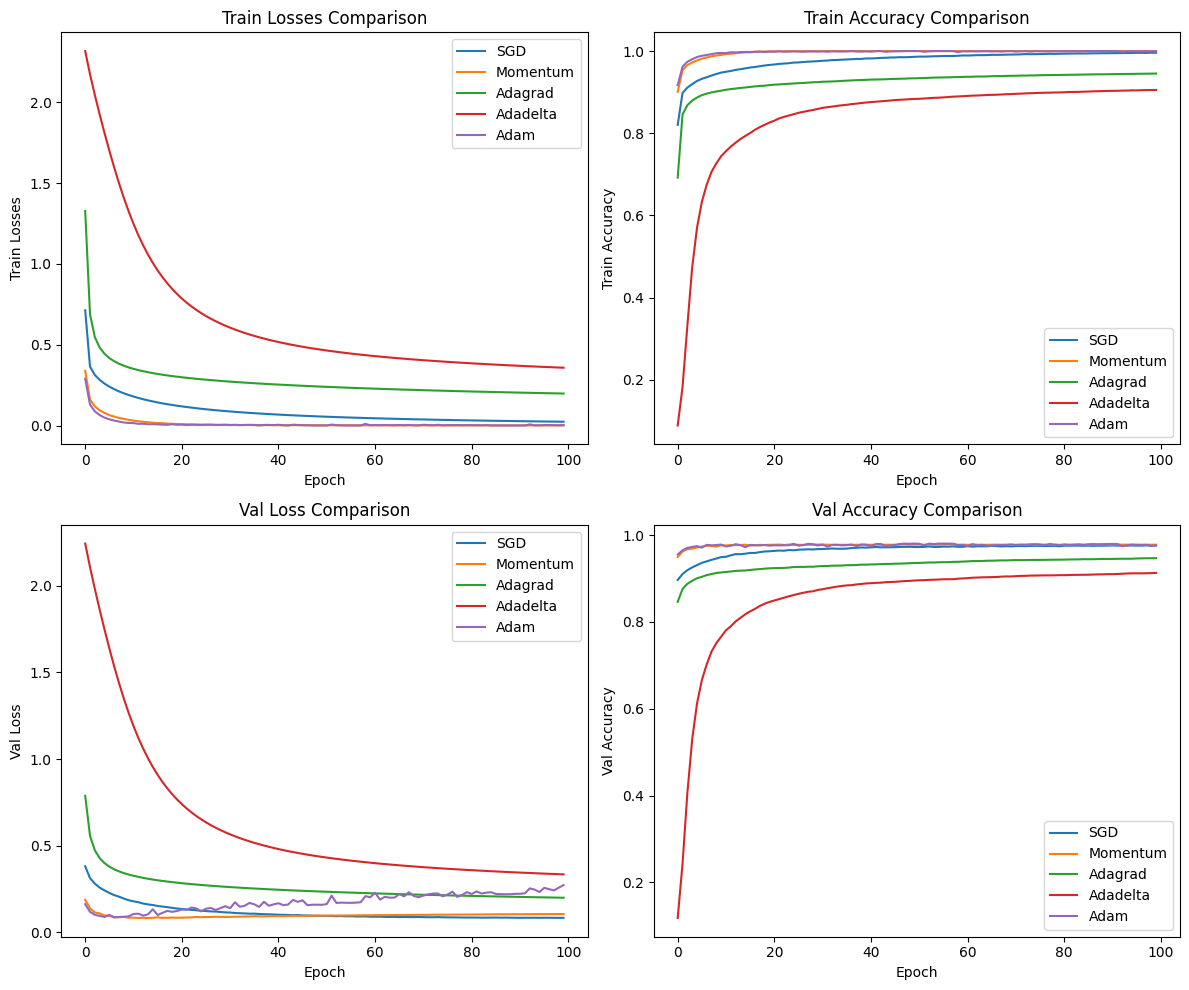

In [9]:
import matplotlib.pyplot as plt

# Extract the results for visualization
optimizer_names = list(results.keys())

# Create separate subplots for each metric
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

# Loop through each metric and plot comparison for each optimizer
metrics = ['train_losses', 'train_accuracy', 'val_loss', 'val_accuracy']

for metric, ax in zip(metrics, axes):
    for optimizer in optimizer_names:
        values = results[optimizer][metric]
        ax.plot(values, label=optimizer)

    # Add labels and legend to the subplot
    ax.set_xlabel('Epoch')
    ax.set_ylabel(metric.replace('_', ' ').title())
    ax.set_title(f'{metric.replace("_", " ").title()} Comparison')
    ax.legend()

# Adjust layout and display the plots
plt.tight_layout()
plt.show()
